# HW2

Data https://drive.google.com/file/d/13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu/view?usp=sharing

Cards outliers https://docs.google.com/spreadsheets/d/1SIf2vawr2VWwme_6v_VZyHivJ502bWFN70SQLf-iBkM/edit?usp=sharing


##Task

- Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if a bunch of money is going to spend)
- Prove that the frequency of shopping grows around the wage taking days (1-6 days of each month, 20 -26 days of each month)
- Define such cohort existence:
    - Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
    - Average purchase sum - The customers that usually spend the same amount of money 
    - Usual cart - The customers grouped by the product groups

Create a pull request by using a format hw2;lastname;firstname

## Data
The raw dataset consists of 9 different columns

- date - is the timestamp when the purchase was done

- id_doc - receipt's id

- id_order - is the order's id. Order's id is equal to 0 when the purchase was done offline, otherwise online.

- id_card - is the unique id of customer.

- id_tov - is the unique id of product's id

- id_kontr - distributor's id

- quantity - the amount of the same product in receipt which was purchased

- sum - price of the product

- is_green - shows that product is under discount or not

In [1]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

In [2]:
# downloading inno_stats.zip
!gdown --id 13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu

Downloading...
From: https://drive.google.com/uc?id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu
To: /content/inno_stats.tar.gz
1.91GB [00:16, 116MB/s]


Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

!mkdir data

!tar -xf inno_stats.tar.gz -C ./data

In [3]:
!mkdir data
!tar -xf inno_stats.tar.gz -C ./data

In [2]:
data_path = Path('./data/').resolve()
!ls {data_path}

09_groups.csv  10_groups.csv  11_groups.csv  product_groups.csv


In [2]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [4]:
g_10 = pd.read_csv('./data/10_groups.csv')
g_10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-10-01 20:22:55,2035558,0.0,1636749,52,339,1.0,107.90,0,10004
1,2020-10-01 20:54:12,13037327,0.0,267261,52,339,1.0,80.04,0,10004
2,2020-10-01 21:25:59,1430590,0.0,1331395,61,379,1.0,31.92,1,10091
3,2020-10-01 13:31:01,3504660,0.0,641525,61,97,1.0,55.98,0,10091
4,2020-10-01 16:32:06,11024438,0.0,1325852,61,97,4.0,176.00,0,10091


In [5]:
g_11 = pd.read_csv('./data/11_groups.csv')
g_11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-11-01 15:29:01,3121751,0.0,332351,52,271,1.0,107.98,0,10004
1,2020-11-01 12:41:10,22047017,8293317.0,1875438,52,-9999,1.0,108.00,0,10004
2,2020-11-01 13:17:09,6419825,0.0,563112,61,379,2.0,112.00,0,10091
3,2020-11-01 12:31:31,10284541,0.0,1841710,61,379,1.0,55.91,0,10091
4,2020-11-01 13:06:15,10424967,0.0,1304277,61,271,2.0,87.80,0,10091


In [30]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()

,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [3]:
bad_ids = pd.read_csv('bad_ids.csv')
bad_ids.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


In [4]:
df = g_9
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100858 entries, 0 to 42100857
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   id_doc    int64  
 2   id_order  float64
 3   id_card   int64  
 4   id_tov    int64  
 5   id_kontr  int64  
 6   quantity  float64
 7   sum       float64
 8   is_green  int64  
 9   id_group  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ GB


In [5]:
df = df[~df.id_card.isin(bad_ids.id_card.values)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38466003 entries, 0 to 42100857
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   id_doc    int64  
 2   id_order  float64
 3   id_card   int64  
 4   id_tov    int64  
 5   id_kontr  int64  
 6   quantity  float64
 7   sum       float64
 8   is_green  int64  
 9   id_group  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.2+ GB


Number of samples decreasef from 42 100 858 to 38 466 003

## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

Let us propose a null hypothesis, that is actually the opposite of the statement that we need to check (that would allows us to reject H0 and confirm original statement consequently)

**H0**: buying discounted products DOES NOT depend on the average order sum

**HA**: buying discounted products DOES depend on the average order sum

In [19]:
from scipy.stats import ttest_ind

avg_receipt_sum = df.groupby('id_doc')['sum'].mean()
avg_receipt_disc = df.groupby('id_doc')['is_green'].count()

ttest_ind(avg_receipt_disc.values, avg_receipt_sum.values)

Ttest_indResult(statistic=-3678.842357621653, pvalue=0.0)

p-values is low, we reject the H0, that is why buying discounted products DOES depend on the average order sum

## Task 2
Prove that the frequency of shopping grows around the wage taking days.

In [20]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

recipts_cnt_per_day = df.groupby(df.date.dt.day)['id_doc'].count()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


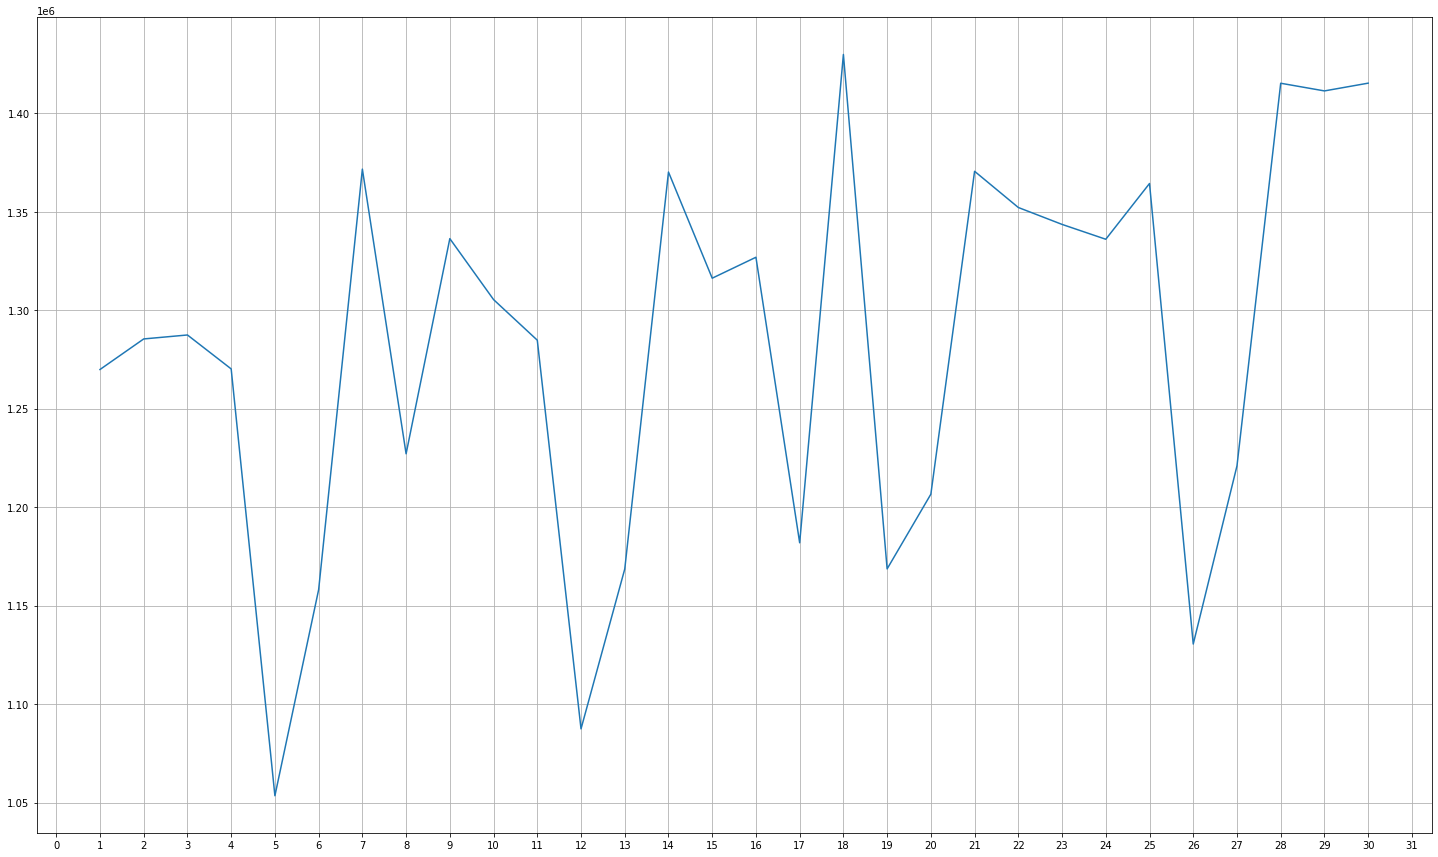

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plt.locator_params(axis='x', nbins=31+2)
plt.grid()
plt.plot(recipts_cnt_per_day)

Let's assume that wage taking days are 1-5 and 20-25. We can see local minimas at 5th, 20th and 26th days. Thay could mean that people buy rarely before getting wage (function is decreasing) and start buying more frequently right after getting days and a few days after (funtion is increasing).

## Task 3
Define such cohort existance:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

### Frequent buyers

Text(0, 0.5, 'Number of purchases')

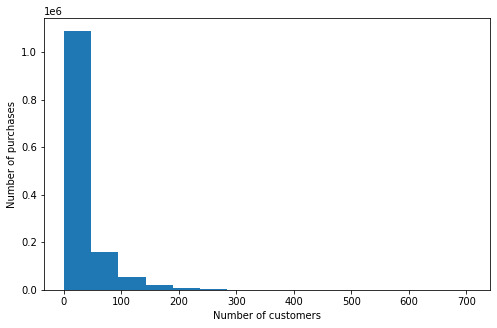

In [22]:
import matplotlib.pyplot as plt

cnt_reciepts = df.groupby('id_card')['id_doc'].count()

plt.figure(figsize=(8, 5))
plt.hist(cnt_reciepts, bins=15)
plt.xlabel('Number of customers')
plt.ylabel('Number of purchases')

Text(0, 0.5, 'Number of purchases')

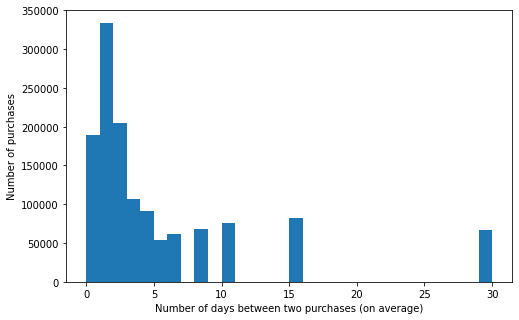

In [23]:
freq_reciepts = (1 / cnt_reciepts[cnt_reciepts > 0] * 30).round()

plt.figure(figsize=(8, 5))
plt.hist(freq_reciepts, bins=30)
plt.xlabel('Number of days between two purchases (on average)')
plt.ylabel('Number of purchases')

As we can see most of the people make purchases every other day (number of days between two purhcases in equal to 2). Some of people buy every week

### Average purchase sum

In [24]:
average_purchase_sum = df.groupby('id_card')['sum'].sum()
average_purchase_sum.head()

id_card
0    3607.20
1     147.00
2    1485.00
3    4393.38
4    3905.12
Name: sum, dtype: float64

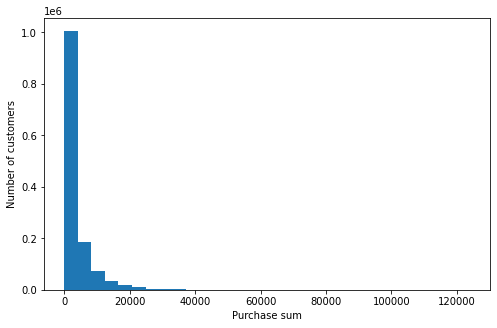

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(average_purchase_sum // 100 * 100, bins=30);

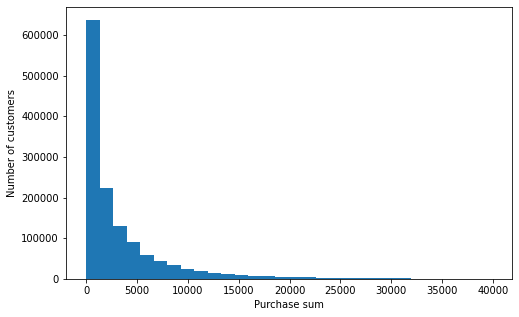

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.ylabel('Number of customers')
plt.xlabel('Purchase sum')
plt.hist(average_purchase_sum[average_purchase_sum < 40000] // 100 * 100, bins=30);

Most of the customers make purchases for less than 1000 rubles

### Usual cart

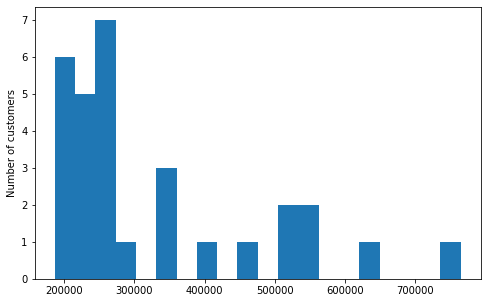

In [27]:
customers_cnt_per_group = df.groupby('id_group')['id_card'].unique().apply(len)

plt.figure(figsize=(8, 5))
plt.hist(customers_cnt_per_group.sort_values(ascending=False)[:30], bins=20)
plt.ylabel('Groups count')
plt.ylabel('Number of customers');

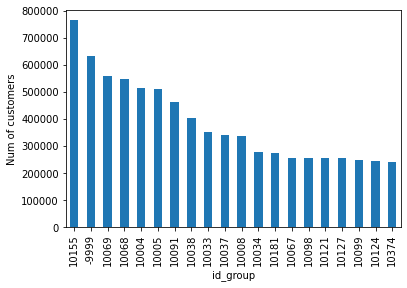

In [29]:
customers_cnt_per_group = df.groupby(by=['id_group'])['id_card'].unique().apply(len)
customers_cnt_per_group = customers_cnt_per_group.sort_values(ascending=False)
customers_cnt_per_group[:20].plot(kind='bar')

plt.ylabel('Num of customers');

In [71]:
interesting_groups = p_g[p_g.id_group.isin(customers_cnt_per_group[:20].index)]
interesting_groups.drop_duplicates('id_group', 'first', inplace=True)
interesting_groups['occurence'] = customers_cnt_per_group[:20]
interesting_groups.sort_values('occurence', ascending=False)
interesting_groups[['id_group', 'name_group', 'occurence']].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id_group,name_group,occurence
0,10004,Кисломолочные продукты,NaN
43,10005,Творог,NaN
93,10008,"Торты, пирожные, муссы, суфле",NaN
960,10033,"Выпечка, печенье, вафли, пряники",NaN
1032,10034,"Леденцы, мармелад, халва, зефир, восточные сла...",NaN


Most of the clients buy products from group "Кисломолочные продукты"